# 🎀 **Irst incontra Ragazze Digitali** 🎀
## Esercitazione:

### Glossario
- *Burden Of Travel* : sfide, alle responsabilità o alle difficoltà che individui o gruppi possono affrontare quando intraprendono un viaggio o si spostano da un luogo all'altro. Questo onere può comprendere una serie di fattori, tra cui le sfide logistiche, i costi finanziari, lo sforzo fisico, lo stress emotivo associato al viaggio, l'impatto ambientale.

- *Latitudine e longitudine*: sono le coordinate principali che si servono di quelle linee immaginarie chiamate meridiani e paralleli che sono usate dai geografi per "tagliare in porzioni" lo spazio della superficie terrestre.

### Obiettivo ✳
Analisi del numero ottimale di punti erogativi per la distribuzione di farmaci orali oncologici allo scopo di ridurre e omogeneizzare il burden of travel per il paziente.


### Caratteristiche analisi
- Anni di analisi: 2019-2020-2021
- Tutti i farmaci orali per terapie oncologiche
- Punti di erogazione romagnoli

### Variabli coinvolte
- Comune (Nome del comune romagnolo in analisi)
- Latitudine ( Latitudine del comune per rappresentazione)
- Longitudine (Longitudine del comune per rappresentazione)
- Accessi (Numero di accessi - volte che hanno ritirato il farmaco )
- Popolazione ( numero di abitanti del comune di riferimento)

 ### 1 -  Import delle librerie e pacchetti utili per la compilzione del codice

In [ ]:
import pandas as pd                               # For data management
import numpy as np                                # For data management
import pandas as pd                               # For data management
import seaborn as sns                             # For data visualization and specifically for pairplot()
import matplotlib.pyplot as plt                   # For data visualization
from sklearn import datasets                      # To import the sample dataset
from sklearn.preprocessing import StandardScaler  # To transform the dataset
from sklearn.cluster import KMeans                # To instantiate, train and use model
from sklearn import metrics                       # For Model Evaluation
import matplotlib.pyplot as plt                   # For data visualization
from geopy.geocoders import Nominatim             # For geography data management
import geopy.distance                             # For geography data management
import random                                     # For generation of random number
from PIL import Image, ImageDraw                  # For generation of image
from operator import index
import itertools
import matplotlib.animation as animation
import collections
geolocator = Nominatim(user_agent="rd")
import warnings
warnings.filterwarnings('ignore')
!pip install pydeck
import pydeck as pdk
import math

### 2 - Scaricamento di un repository dell'esercitazione per scaricare i dati utili per l'analisi

In [ ]:
!git clone https://github.com/IRST-Data-Unit/EsercitazioneRagazzeDigitali/

### 3 - Pulizia del dato. Colonne latitudine e longitude

In [4]:
path = '/content/EsercitazioneRagazzeDigitali/fed.csv'
dataframe_raw = pd.read_csv(path, sep=',')
# Conversione colonne riconosciute come stringhe in numeri float per poterli utilizzare
#dataframe_raw['Latitudine'] = pd.to_numeric(dataframe_raw['Latitudine'].str.replace(',','.'))
#dataframe_raw['Longitudine'] = pd.to_numeric(dataframe_raw['Longitudine'].str.replace(',','.'))

### 4 - Stampa del dataset (nome delle variabili e dei valori che assumono)

In [ ]:
dataframe_raw

### 5 - Obiettivo esercitazione

Ipoteticamente vorremmo **minimizzare** il numero di punti erogativi per risparmiare sui costi di strutture in eccesso e **minimizzare** però il numero di chilometri che ogni paziente deve percorrere per ottenere il farmaco.

#### Limiti del lavoro
- Useremo per semplicità per valutare i punti erogativi migliori la distanza euclidea cioè quella che intercorre tra 2 punti in uno spazio X e Y, ma nella realtà sarebbe opportuno utilizzare una distanza geografica (chilometri/metri) o il tempo di viaggio che è strettamente legato alla conformità e caratteristiche del territorio e disponbilità di mezzi; ma anche dalle abitudini dei pazienti negli spostamenti.
- Non si considera in analisi l'aspetto epidemiologico, la frequenza di dosaggio, le nuove molecole
- Ci si basa su un database regionale che non è completo di tutti gli aspetti.

Consideriamo perciò questa esercitazione come "gioco".


### 6 -  Inizio codice esercitazione

---

Inizializzazione variabili utili e variabili fisse come latitudine e longitude delle città "fisse" e più ampie.

In [6]:
color_array=[]
lat_array =[]
lon_array=[]
xc_array=[]
yc_array=[]
city_c_array=[]
dist_array = []
label_array= []
pop_com_array = []
#Forlì, Cesena, Ravenna, Rimini
#Longitudini
y_fixed =[12.0537,12.249722,12.1965711,12.580833]
#Latitudini
x_fixed =[44.2228,44.143333,44.4157307,44.063333]
statistisc = pd.DataFrame()

# Qui possiamo impostare il numero di cluster
k = 2

### 7 -  Applicazione algoritmo K-Means

## sklearn.cluster.KMeans
`class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')[source]`


In [7]:
dataframe = dataframe_raw[['Latitudine','Longitudine']] #Selezione delle due variabili che rappresentano l'ambiente
kmeans_model = KMeans(n_clusters = k)  #Creazione del modello di K-Means con k il num di cluster scelti
weight = dataframe_raw['# Accessi'] # Minimizzazione della distanza pesata per numero di Accessi
kmeans_model.fit(dataframe,sample_weight=weight) # Applicazione del modello sui dati
centroids = kmeans_model.cluster_centers_ #Salvataggio punti centroidi
dataframe["cluster"] = kmeans_model.labels_ #Salvataggio etichette dei centroidi ai punti

### 8 - Ricognizione punti individuati con comune in cui si trovano e creazione delle statistiche

In [8]:
df_cluster = pd.DataFrame(columns=['long','lat','city'])
for p in centroids:
  c= ''
  location = geolocator.reverse(str(p[0])+","+str(p[1]))
  address = location.raw['address']
  city = address.get('city', '')
  town = address.get('town', '')
  state = address.get('state', '')
  country = address.get('country', '')
  village =address.get('village', '')
  county = address.get('county', '')
  neighbourhood = address.get('neighbourhood', '')
  province = address.get('province', '')
  suburb = address.get('suburb', '')
  c='City:' +(town or city  or county) +'|'+'SubUrb:'+ ( village or neighbourhood or suburb or '-')+'|'+'Province:' + (province or '-').strip()
  new_row = {'long':p[1],'lat':p[0],'city':c}
  df_cluster = df_cluster.append(new_row,ignore_index=True)

dataframe["Comune"] = dataframe_raw['Comune']
dataframe["city_cluster"] = " "
dataframe["latc"] = " "
dataframe["lonc"] = " "
dataframe["dist"] = " "
dataframe["coordinates"] = " "
dataframe["accessi"] = dataframe_raw['# Accessi']
for i in range (0,k):
  dataframe.loc[dataframe['cluster'] == i, 'city_cluster'] = df_cluster['city'][i]
  dataframe.loc[dataframe['cluster'] == i, 'latc'] = df_cluster['lat'][i]
  dataframe.loc[dataframe['cluster'] == i, 'lonc'] = df_cluster['long'][i]
for index in range(len(dataframe)):
  tupla_origin = (float(dataframe['Longitudine'][index]),float(dataframe['Latitudine'][index]))
  tupla_fin = (float(dataframe['lonc'][index]),float(dataframe['latc'][index]))
  dataframe['dist'][index] = geopy.distance.geodesic(tupla_origin, tupla_fin).km

#Valutazione distanza tra ogni punto del cluster trovato e distanza.

colors  = []
color_dict = {}
for c in range(0,k):
  r = lambda: random.randint(0,255)
  colors.append('#%02X%02X%02X' % (r(),r(),r()))
  color_dict[c] = colors[c]
  for c in range(0,k):
    dataframe['color']=dataframe['cluster'].map(color_dict)

acc = dataframe_raw['# Accessi']
color_array.append(dataframe['color'])
lat_array.append(dataframe['Latitudine'])
lon_array.append(dataframe['Longitudine'])
xc_array.append(df_cluster['lat'])
yc_array.append(df_cluster['long'])
city_c_array.append(df_cluster['city'])
dist_array.append(dataframe['dist'])

# Salvataggio massima e minima distanza tra ogni cluster trovato e punti che gli appartengono.
statistisc['city'] = df_cluster['city']
statistisc['max_dist_intraclu'] = dataframe.groupby('cluster')['dist'].apply(lambda x: x.max()).reset_index(name='count')['count']
statistisc['min_dist_intraclu'] = dataframe.groupby('cluster')['dist'].apply(lambda x: x.min()).reset_index(name='count')['count']

label_array.append(np.array(dataframe['cluster']))

In [ ]:
#Stampa delle statistiche
#Tutte le distanza massima e minime tra centroide del punto individuato e i punti appartenenti
statistisc

### 9 -  Visualizzazione  della distribuzione del numero di centroidi individuati

In [ ]:
#Costruiamo la figura con i punti indivuati, i punti fissi e la grandezza delle bolle dipende dal numero di accessi effettuati
fig, ax = plt.subplots(figsize=(8,8))
ax.clear()
ax.set_title('Distribuition with k= {}'.format(k),
              fontdict={'fontsize':20})
# replot things
ax.scatter(x = lon_array, y = lat_array, s=acc,
            c=color_array[0], alpha=0.4)
#Centroids
ax.scatter(yc_array, xc_array, c='red',
            s=400,marker='h',label='Centroid')
#Fixed city
ax.scatter(y_fixed, x_fixed, c='black', s=200,
            alpha=0.8,marker='s',label='fixed')
#Disegnamo i 4 punti fissi delle 4 città principali.
ax.annotate('Forlì',(y_fixed[0],x_fixed[0]),fontsize=16)
ax.annotate('Cesena',(y_fixed[1],x_fixed[1]),fontsize=16)
ax.annotate('Ravenna',(y_fixed[2],x_fixed[2]),fontsize=16)
ax.annotate('Rimini',(y_fixed[3],x_fixed[3]),fontsize=16)
ax.set_xlabel('Longitudine')
ax.set_ylabel('Latitudine')
ax.legend()

10 - Visualizzazione in mappa reale dei punti e dei cluster

In [11]:
# Set delle variabili utili per la visualizzazione come colori, raggio e coordinate spaziali
dataframe["color"] = ""
dataframe["color"] = color_array[0]
for index, elem in enumerate(color_array[0]):
  h = elem.lstrip('#')
  r = int(h[0:2], 16)
  g = int(h[2:4], 16)
  b = int(h[4:6], 16)
  dataframe["color"][index] = [r,g,b]

dataframe['exits_radius'] = ""
df_cluster['coordinates'] = ""
dataframe["exits_radius"] = dataframe["accessi"].apply(lambda exits_count: (exits_count/3))
for index, row in dataframe.iterrows():
  dataframe['coordinates'][index] = [row['Longitudine'],row['Latitudine']]

for index, row in df_cluster.iterrows():
  df_cluster['coordinates'][index] = [row['long'],row['lat']]

In [ ]:
#Creazione dei livelli per la visualizzazione sulla mappa
# Uno per ogni comune dell'analisi, la cui dimensione della bolla è proporzionale al numero di accessi effettuati in quel comune
# In rosso i punti centroidi di ogni cluster
layer = pdk.Layer(
    "ScatterplotLayer",
    dataframe,
    pickable=True,
    opacity=0.5,
    stroked=True,
    filled=True,
    radius_scale=6,
    radius_min_pixels=1,
    radius_max_pixels=100,
    line_width_min_pixels=1,
    get_position="coordinates",
    get_radius="exits_radius",
    get_fill_color="color",
    get_line_color=[0, 0, 0],
)

layer2 = pdk.Layer(
    "ScatterplotLayer",
    df_cluster,
    pickable=True,
    opacity=1,
    stroked=True,
    filled=True,
    radius_scale=6,
    radius_min_pixels=1,
    radius_max_pixels=100,
    line_width_min_pixels=1,
    get_position="coordinates",
    get_radius=80,
    get_fill_color=[255,10,0],
    get_line_color=[0, 0, 0],
)

# Set the viewport location
view_state = pdk.ViewState(latitude=44.263550, longitude=12.347682, zoom=10, bearing=0, pitch=0)
# Render
r = pdk.Deck(map_style='light',layers=[layer,layer2], initial_view_state=view_state)
r.to_html("scatterplot_layer.html")

## Ora torna al punto 6 cambia il numero di cluster K e verifica come le distanze cambiano.



---



### 11 -  Come trovare il numero ottimo di cluster

In [14]:
#Preparazione del dataset con coordinate dei punti e pesi corrispondenti al numero di accessi
dataframe_opt = dataframe[['Latitudine','Longitudine']]
weight = dataframe_raw['# Accessi']
Sum_of_squared_distances = []
K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k,random_state = 4,)
    km = km.fit(dataframe_opt,sample_weight=weight)
    #Calcolo sommatoria distanze al quadrato tra centroide e punto del cluster
    Sum_of_squared_distances.append(km.inertia_)

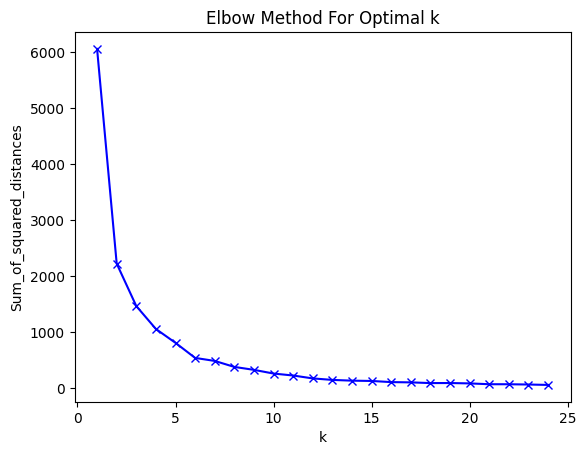

In [15]:
#Visualizzazione andamento degli errori al crescere del numero di K
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()